In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test= pd.read_csv("test.csv")

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:>

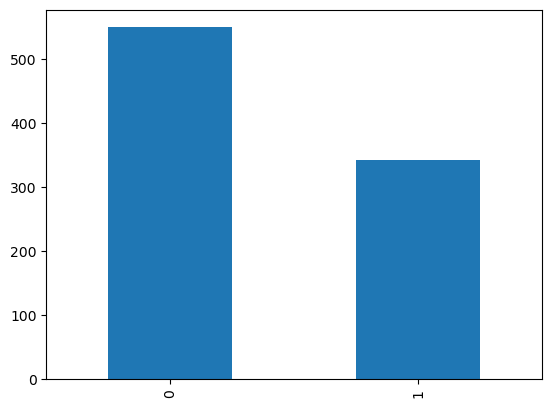

In [7]:
train['Survived'].value_counts().plot.bar()

In [8]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

<AxesSubplot:>

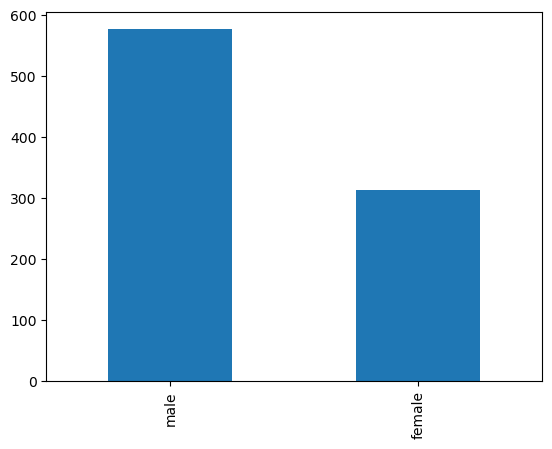

In [10]:
train['Sex'].value_counts().plot.bar()

In [11]:
pd.crosstab(train['Survived'],train['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived'>

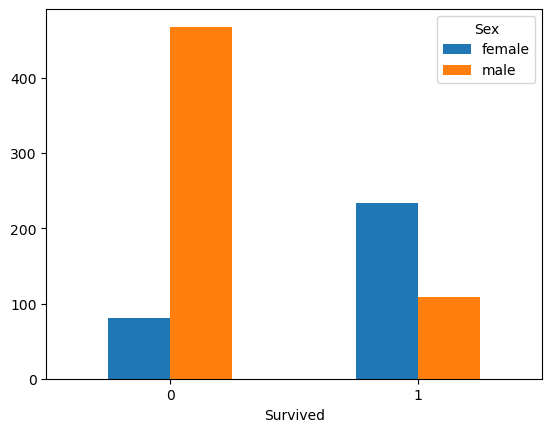

In [12]:
pd.crosstab(train['Survived'],train['Sex']).plot.bar(rot=0)

In [13]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
train['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

<AxesSubplot:>

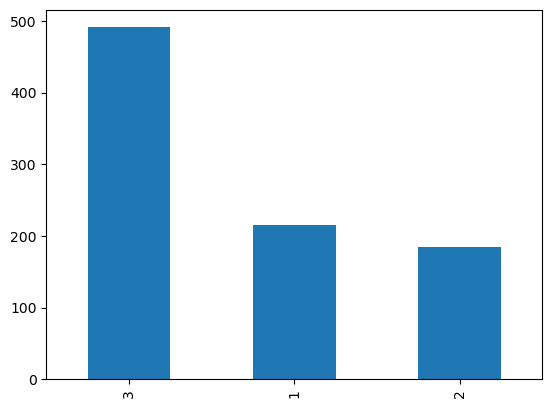

In [15]:
train['Pclass'].value_counts().plot.bar()

In [16]:
pd.crosstab(train['Survived'],train['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Survived'>

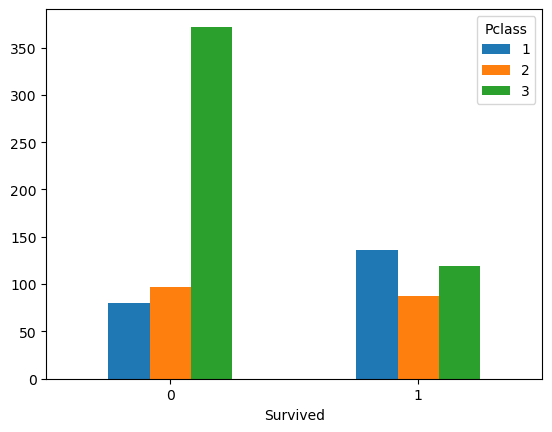

In [17]:
pd.crosstab(train['Survived'],train['Pclass']).plot.bar(rot=0)

In [18]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
train['Age'].fillna(int(train['Age'].mean()),inplace=True)

In [22]:
train['Embarked'].fillna('S',inplace=True)

In [23]:
train['Cabin'].fillna('None',inplace=True)

In [24]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:
train['Sex'].replace('male', 0,inplace=True)
train['Sex'].replace('female', 1,inplace=True)

<AxesSubplot:>

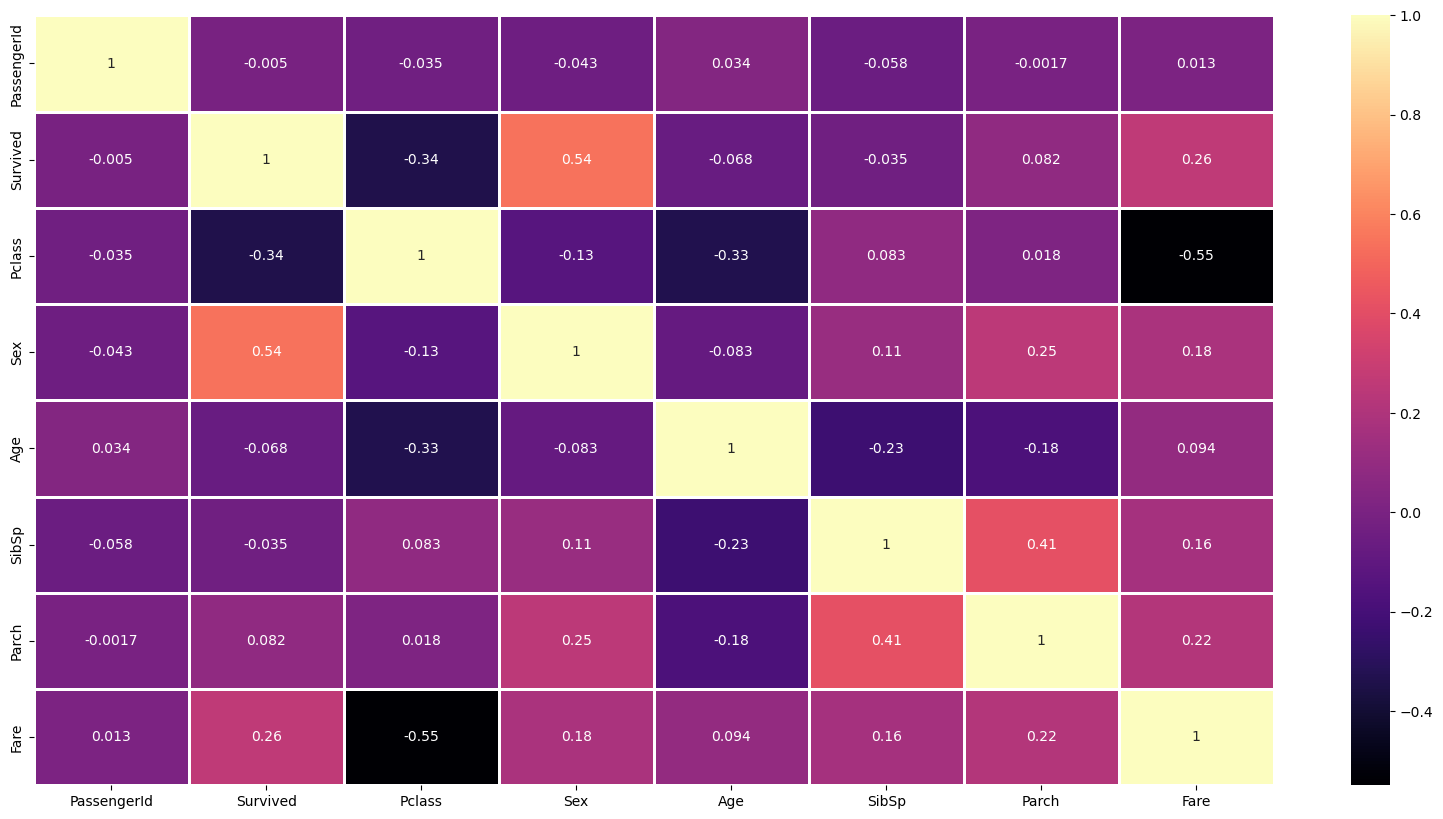

In [26]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(train.corr(),annot=True,linewidths=1,cmap="magma")

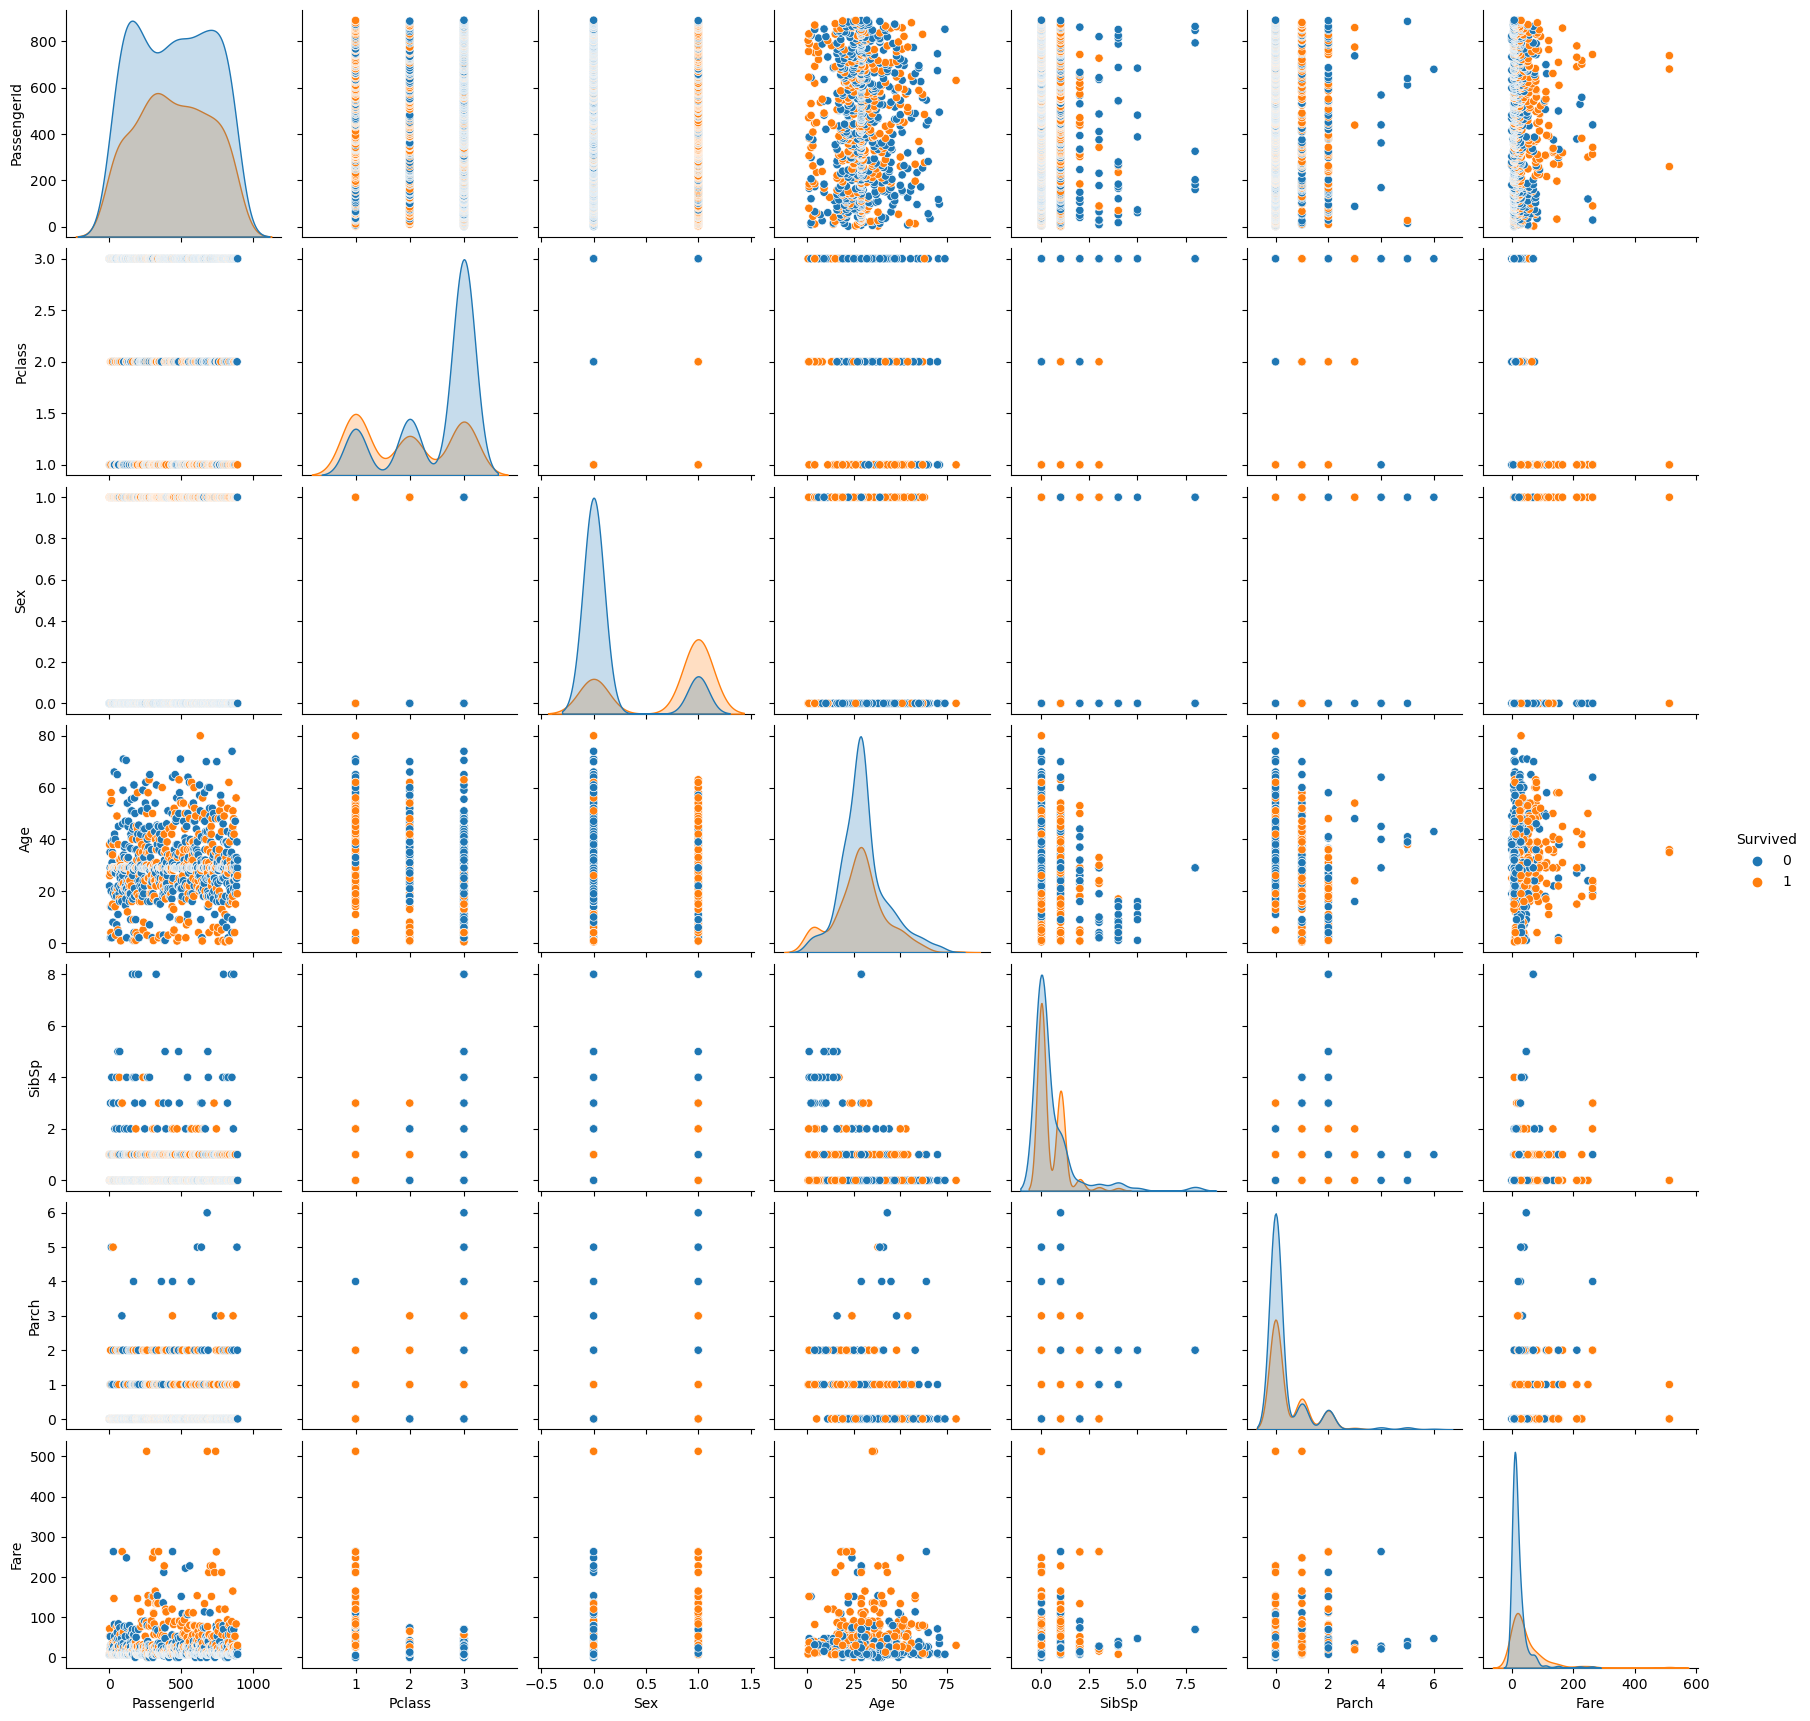

In [27]:
sn.pairplot(train,hue='Survived')

In [28]:
titles = set()
for name in train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Master', 'Mme', 'Don', 'Mrs', 'Lady', 'Capt', 'Mr', 'Col', 'Ms', 'the Countess', 'Major', 'Rev', 'Dr', 'Miss', 'Mlle', 'Jonkheer', 'Sir'}


In [29]:
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [30]:
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train['Title'] = train.Title.map(Title_Dictionary)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,None,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,None,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,None,S,Mr


In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,None,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,None,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,None,S,Mr


In [32]:
train = train.drop('Name',1)

In [33]:
train = train.drop('Ticket',1)

In [34]:
train = train.drop('Cabin',1)

In [35]:
train = pd.get_dummies(train)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0
3,4,1,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0
4,5,0,3,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0


In [37]:
target = train['Survived']

In [38]:
train = train.drop('Survived',1)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_val,y_train,y_val = train_test_split(train,target,test_size=0.2,random_state=12)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dclf=DecisionTreeClassifier(max_depth=5)

In [44]:
dclf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [45]:
prediction1=dclf.predict(x_val)

In [46]:
accuracy_score(y_val,prediction1)

0.7430167597765364

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg = LogisticRegression()

In [49]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [50]:
prediction2 = log_reg.predict(x_val)

In [51]:
accuracy_score(y_val,prediction2)

0.8156424581005587

In [52]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
test['Age'].fillna(int(test['Age'].mean()),inplace=True)

In [54]:
test['Fare'].fillna(50,inplace=True)

In [55]:
test['Cabin'].fillna('None',inplace=True)

In [56]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [57]:
test['Sex'].replace('male', 0,inplace=True)
test['Sex'].replace('female', 1,inplace=True)

In [58]:
titles = set()
for name in test['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Master', 'Mrs', 'Mr', 'Col', 'Dona', 'Ms', 'Rev', 'Dr', 'Miss'}


In [59]:
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [60]:
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Title.map(Title_Dictionary)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,None,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,None,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,None,Q,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,None,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,None,S,Mrs


In [61]:
test = test.drop('Name',1)

In [62]:
test = test.drop('Cabin',1)

In [63]:
test = test.drop('Ticket',1)

In [64]:
test = pd.get_dummies(test)

In [65]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer
0,892,3,0,34.5,0,0,7.8292,0,1,0,0,0,1,0,0
1,893,3,1,47.0,1,0,7.0000,0,0,1,0,0,0,1,0
2,894,2,0,62.0,0,0,9.6875,0,1,0,0,0,1,0,0
3,895,3,0,27.0,0,0,8.6625,0,0,1,0,0,1,0,0
4,896,3,1,22.0,1,1,12.2875,0,0,1,0,0,0,1,0


In [66]:
test['Title_Royality']=0

In [67]:
test.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Officer     0
Title_Royality    0
dtype: int64

In [68]:
test_prediction = log_reg.predict(test)

In [69]:
submission = pd.DataFrame()

In [70]:
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = test_prediction

In [71]:
submission.to_csv('submission_titanc.csv', header=True, index=False)